# Data Cleaning for a pioneer in Data Science

## Introduction

#### Goal:
The goal of this work is to perform the first step of the Data Science analysis, which is the data cleaning. This analysis contains basic steps of the data cleaning, which is suitable for pioneers in this field such as myself.

#### Documentation:
2019 Airbnb dataset for New York City will be used for the analysis. The dataset is public and available in Kaggle.

#### Data Dictionary: 
- id: Unique Identifier
- name: Name of Property
- host_id: Owner Unique ID
- host_name: Owner Name
- neighbourhood_group: Neighbourhood group
- neighbourhood: Neighbourhood
- latitude: Location latitude
- longitude: Location longitude
- room_type: Type of rental
- price: Price of rental per night
- minimum_nights: Minimum nights stay allowed renting property
- number_of_reviews: Number of reviews for the property
- last_review: Date of last review
- reviews_per_month: Average number of reviews per month
- calculated_host_listings_count: Number of listing by same property owner
- availability_365: Number of days per year property is available

## Data Cleaning

In [1]:
# importing modules
import pandas as pd
import numpy as np 
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab # the code for performing spectral computations
import matplotlib
plt.style.use('ggplot') # the code will apply the "ggplot" style, which adjusts the style to emulate ggplot
from matplotlib.pyplot import figure # the figure call to create figures

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # the function is used to change the default parameters of the plot's figure

from scipy import stats

pd.options.mode.chained_assignment = None # to switch off the warning 'SettingWithCopyWarning'

In [2]:
# uploading dataset in comma-separated values (csv) format
df = pd.read_csv('AB_NYC_2019_dataset.csv')
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


It's also recommended to visually look at the data.

In [3]:
# checking dataset dimension
df.shape

(48895, 16)

According to the above output, the dataset contains 48,895 observations/rows and 16 variables/columns.

In [4]:
# checking variable types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

As per the above output, besides variable types, we can also notice that some variables have missing data because values of Non-Null column are less than overall number of the observations/rows. For example, 'last_review' variable has 38,843 observations/rows instead of 48,895.

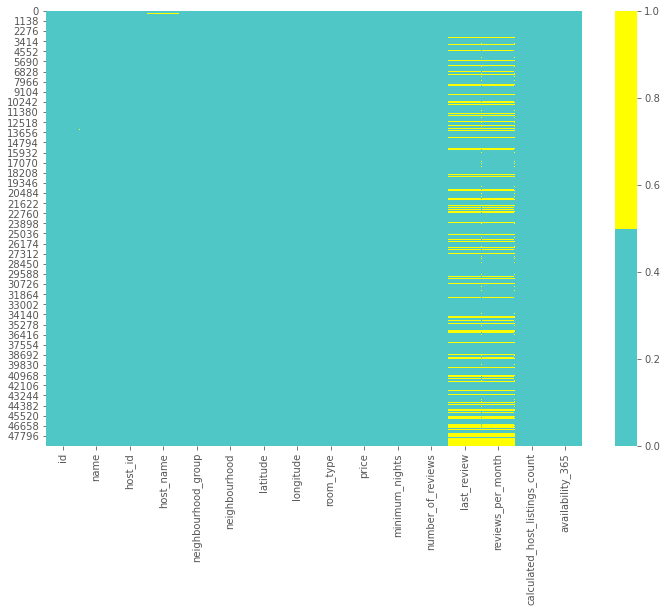

In [5]:
# visual look at missing data by building missing data heatmap
colours = ['#50C7C7', '#ffff00']
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))

The chart above is the great way to visually check the missing data patterns. The horizontal axis demonstrates the title of the variables; the vertical axis demonstrates the number of observations/rows; the yellow color represents the missing data, while the green color the present data. For instance, we can see that 'last_review' and 'reviews_per_month' variables have missing values throughout many rows. While the other variables almost have no missing data except 'name' and 'host_name', though not significant value of missing data. Additionally, the 'name' and 'host_name' variables are of little significance to get any insight out of those variables.

In [6]:
# checking missing values in %
for col in df.columns:
    missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, (missing*100)))
    #print('{} - {}%'.format(col, round(missing*100))) # if the round is applied, then we won't be able to see missing values for 'name' and 'host_name' 

id - 0.0%
name - 0.03272318232948154%
host_id - 0.0%
host_name - 0.04294917680744453%
neighbourhood_group - 0.0%
neighbourhood - 0.0%
latitude - 0.0%
longitude - 0.0%
room_type - 0.0%
price - 0.0%
minimum_nights - 0.0%
number_of_reviews - 0.0%
last_review - 20.55833929849678%
reviews_per_month - 20.55833929849678%
calculated_host_listings_count - 0.0%
availability_365 - 0.0%


Above is another technique to check missing data in percent for each variable as a list. I don't suggest applying the round function as it won't be giving result for variables with missing data less than 1%, for example, for 'name' and 'host_name' variables in our case.

In [7]:
# checking number of missing data in each column
print(" \nNumber of NaN in each column of a DataFrame:\n\n",
      df.isnull().sum())

 
Number of NaN in each column of a DataFrame:

 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


The above technique can be used to show count of missing data in each column.

In [8]:
# dropping columns with significant number of missing values
high_missing_values_cols = ['last_review', 'reviews_per_month']
df_1 = df.drop(high_missing_values_cols, axis = 1) # axis=0 (or axis='rows' is horizontal axis. axis=1 (or axis='columns') is vertical axis. To take it further, if you use pandas method drop, to remove columns or rows, if you specify axis=1 you will be removing columns. If you specify axis=0 you will be removing rows from dataset.

Since 'last_review' and 'reviews_per_month' columns have significant value of missing data, they can be removed from the dataset, however, it's recommended to remove entire columns from the dataset only if they don't provide useful information. If the variables provide significant information, it's suggested to impute the missing values by its median for numeric variables or replace for categorical values. In our example, I will apply the drop function to columns with significant value of missing data.

In [9]:
# accessing columns of the updated dataset
df_1.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

As we can see from the above output, the revised dataset df_1 does not contain variables: 'last_review' and 'reviews_per_month'.

In [10]:
# filling missing data for remaining two columns with insignificant number of missing values ('name' & 'host_name')
df_1[['name', 'host_name']] = df_1[['name', 'host_name']].fillna('_MISSING_')

In our example, the best option to deal with missing data of 'name' & 'host_name' columns is to fill the missing data in order not to lose any observations/rows, as 'name' & 'host_name' columns are of little significance to get any insight out of those variables and their missing data can be just replaced by some random value rather than removing entire observations/rows.

In [11]:
# checking number of missing data in the updated dataset
print(" \nNumber of NaN in each column of a DataFrame:\n\n",
      df_1.isnull().sum())

 
Number of NaN in each column of a DataFrame:

 id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


As we can see from the above output, there is no any missing data in the dataset, and it can be processed further.

In [12]:
# checking for duplicate data
df_1.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Length: 48895, dtype: bool

Duplicates can be checked for entire datasets as above, and in our case, the output shows no duplicates as boolean series.

In [13]:
# counting for duplicate data 
df_1.duplicated().sum()
df_1.duplicated(subset=['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365']).sum()

0

The above operation can be used to count duplicates as behind the code, it converts True to 1 and False to 0, then it adds them up.

In [14]:
# counting for duplicate data in 'id' column
df_1.duplicated(subset=['id']).sum()

0

In our case, it's most important to check duplicates for 'id' column, as all other columns can theoretically have identical entries.

In [15]:
# checking for non-duplicates
(~df_1.duplicated()).sum()

48895

Above is the operation to check non-duplicates count, just to make sure that its output is equal to total number of observations/rows in the dataset.

In [16]:
# evaluating 5 number summary
summary = df_1.describe(include='all')
summary

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,48895,4.889500e+04,48895,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
unique,NaN,47906,NaN,11453,5,221,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,2.000000,227.000000


According to the above output, potential errors could be uncovered in the dataset, including:

- the min value of 'price' is 0, and it seems to be incorrect data as rentals usually are not free, and it should be scrutinized further;
- the max value of 'price' is 10,000 per night, and it's better to check the value as it seems to be an extreme value;
- the max value of 'minimum_nights' is 1,250. This seems to be an extreme value, as it should not exceed the total number of days per year. In this case, it should be scrutinized further.

Text(0, 0.5, 'Price (USD)')

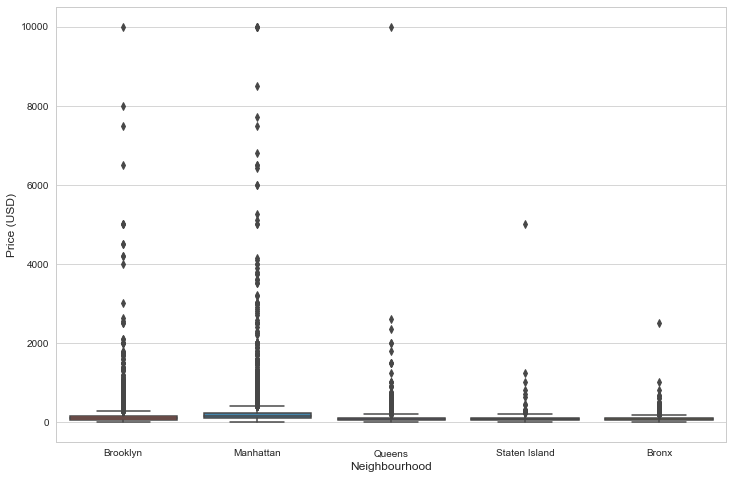

In [17]:
# boxplot to find out outliers and see how prices are distributed among neighbourhoods
sns.set_style(style="whitegrid")
sns.boxplot(x='neighbourhood_group', y='price', data=df_1)
plt.xlabel('Neighbourhood')
plt.ylabel('Price (USD)')

As we can conclude from the above output, the dataset has large scale in the dataset.

Text(0, 0.5, 'Price (USD)')

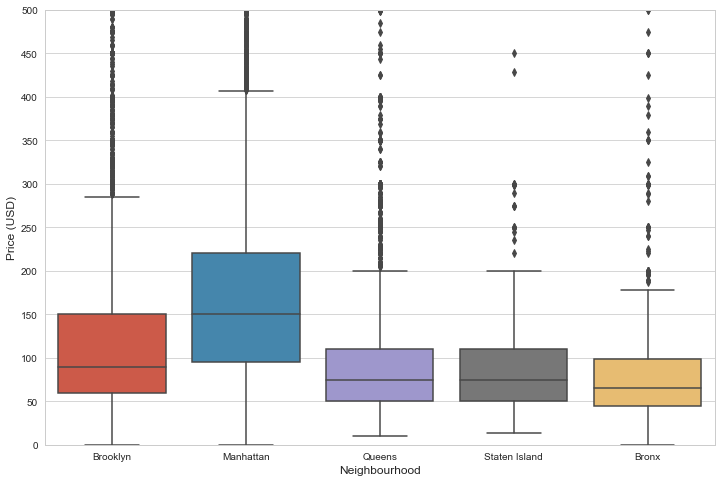

In [18]:
# subset of the above boxplot to better understan how prices are distributed
ax = plt.subplot()
sns.boxplot(x='neighbourhood_group', y='price', data=df_1)
ax.set_ylim(0, 500)
ax.set_yticks(range(0, 501, 50))
plt.xlabel('Neighbourhood')
plt.ylabel('Price (USD)')

In case, when we cannot clearly see the spread of data in boxplot, we can subset it by topping, for example, price up to 500 in our example, so we can see better the distribution. As we can see from the above output, Manhattan has the highest median price and the largest interquartile range (IQR) meaning that this neighbourhood has higher rental prices.

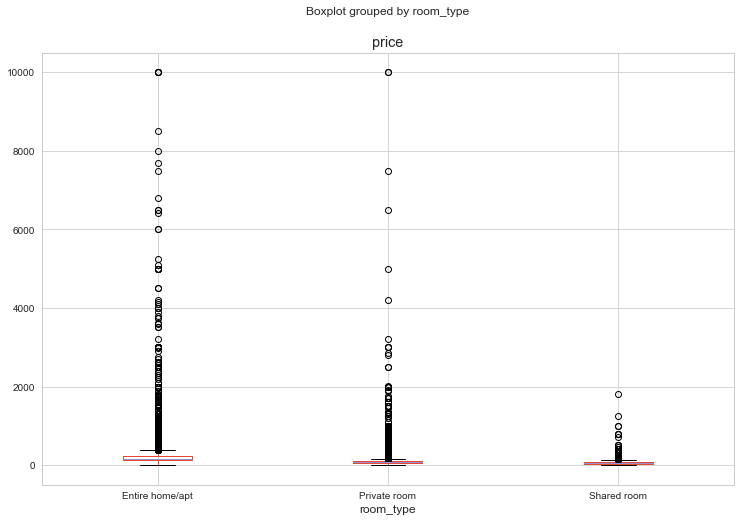

In [19]:
# boxplot to look at 'price' vs 'room_type', where potential errors might exist
df_1.boxplot('price', by='room_type')

The above output shows that there is a private room for 7,000 and 10,000 USD per night, and they seem to be extreme values for room rental. Since it's an extreme point, it should be scrutinized further or there might be a mistake in room type.

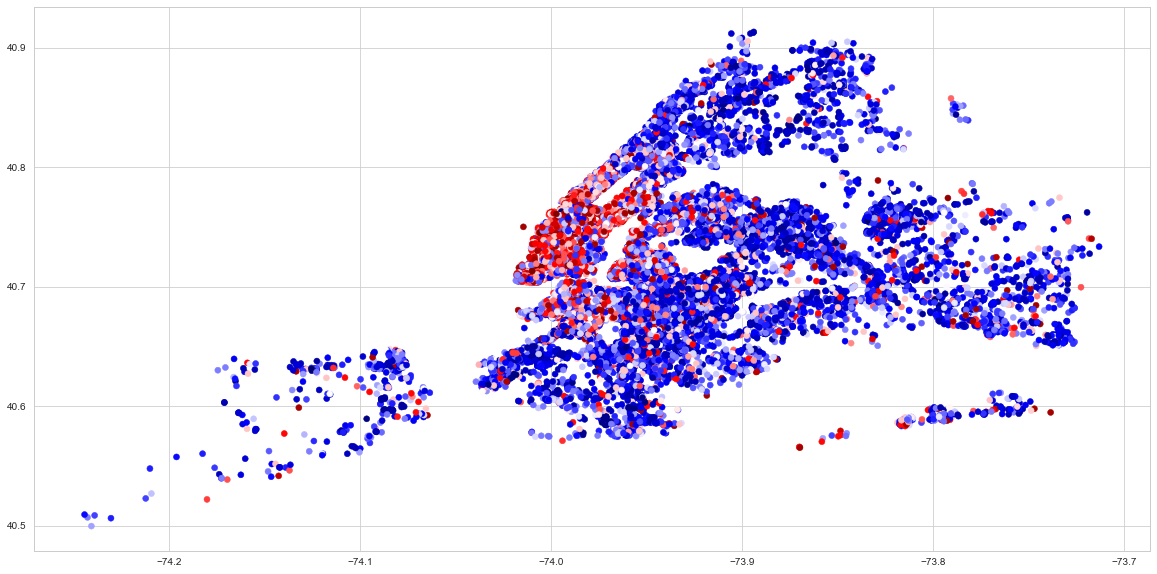

In [20]:
# a scatter plot to visualize the location of rentals and potential outliers
# 90th percentile
percentile_90 = df_1.price.quantile(.90)
df_1_90 = df_1[df_1['price'] <= percentile_90]
plt.figure(figsize=(20, 10))
plt.scatter(df_1_90['longitude'], df_1_90['latitude'], c=df_1_90['price'], cmap='seismic', label=df_1_90['price'])

Above is the representation of rentals location. The lowest rentals are dark blue and the higher rentals are dark red.

#### Conclusion
The above analysis has been performed in order to apply data cleaning techniques and demonstrate that each analysis is unique and the different type of techniques can be applied depending on goal of analysis and condition of the dataset.